<a href="https://colab.research.google.com/github/kubbu2001/BT19ECE029-DIP-Lab/blob/main/BT19ECE029_DIP_ASSIGNMENT_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT 5
HISTOGRAM EQUALIZATION
TANISHK CHANDRASHEKHAR SHEWARE
BT19ECE029

In [14]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math

from matplotlib import pyplot as plt

# Importing all necessary libraries

In [15]:
#Function for makeing an intensity wise frequency distribution table
def frequencyDistribution(image):
  freqTable = []
  M = len(image)
  N = len(image[0])
  for i in range (0,256):
    var = 0
    for x in range(M):
      for y in range(N):
        if i == image[x][y]:
          var = var + 1
    freqTable.append(var)
  
  return freqTable



In [16]:
# Colour image to Gray image converting function
def bgr_to_gray(img):
  B, G, R = img[:,:,0], img[:,:,1], img[:,:,2]
  temp = 0.299*R + 0.114*B + 0.587*G
  temp = temp.astype(int)
  return temp


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 6912, 0, 0, 11520, 0, 2304, 9216, 6912, 0, 4608, 6912, 4608, 2304, 11520, 6912, 9216, 4608, 2304, 4608, 0, 2304, 2304, 2304, 2304, 4608, 0, 0, 0, 2304, 0, 4608, 0, 2304, 2304, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4608, 0, 2304, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


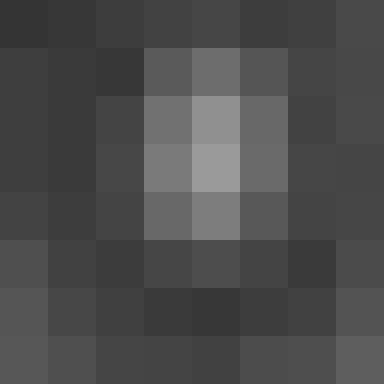

In [17]:
#importing image
I = cv2.imread("/content/88IH.png")

# converting imported colour image to grayscale
Igray = bgr_to_gray(I)

#getting the frequency distribution of the intensities 
freq = frequencyDistribution(Igray)
print(freq)

cv2_imshow(Igray)

#Finding the dimesions of the image
M = len(Igray)
N = len(Igray[0])


In [18]:
# Minimum non zero CDF Value
def findMIN(table):
  tablefreqCDF = np.cumsum(table)
  deletedtablefreqCDF = [i for i in tablefreqCDF if i != 0]
  foundMIN = min(deletedtablefreqCDF)
  return foundMIN
  

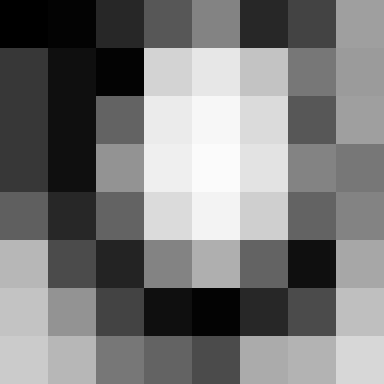

In [19]:

sum = 0
freqCDF = np.cumsum(freq)
#print(freqCDF)

minCDF = findMIN(freq)
M = len(Igray)
N = len(Igray[0])

equilizationIMG = np.zeros( (M, N) , dtype=np.int64)


for i in range(M):
  for j in range(N):
    intensity  = Igray[i][j] - 1
    temp = int(((freqCDF[intensity])/((M*N))) * 255)
    #print(temp)
    equilizationIMG[i][j] = temp

cv2_imshow(equilizationIMG)





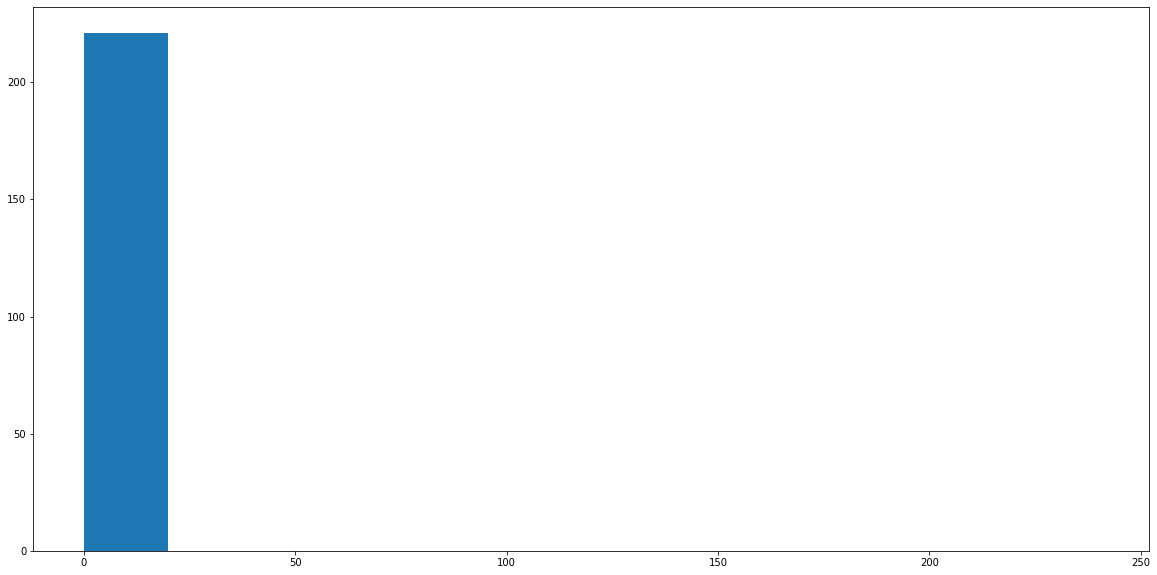

In [20]:

 
# Creating histogram of unequilized image
fig, ax = plt.subplots(figsize =(20, 10))
ax.hist(freq, bins = [i for i in range(0,255,20)])

# Show plot
plt.show()
 

In [21]:
 
# Creating histogram of equilized Image

freqDistributionEquilized = frequencyDistribution(equilizationIMG)
print(freqDistributionEquilized)


[2304, 0, 0, 6912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11520, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 9216, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4608, 0, 0, 0, 0, 0, 0, 0, 6912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4608, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 11520, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9216, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4608, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 4608, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 4608, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 4608, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 4608, 0, 0, 0, 0, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 2304, 0, 0, 0, 0]
